In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# load the housing_data
df = pd.read_csv('housing_data.csv')
df.head()

,status,style,street,city,zip_code,beds,full_baths,half_baths,sqft,year_built,...,style_COOP,style_LAND,style_MOBILE,style_MULTI_FAMILY,style_OTHER,style_SINGLE_FAMILY,style_TOWNHOMES,total_baths,beds_times_sqft,total_baths_times_sqft
0,SOLD,LAND,340 Manor Rd,Staten Island,10314,3.0,1.0,0.0,1381.5,1955.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4144.5,1381.5
1,SOLD,SINGLE_FAMILY,30 Hillview Ln,Staten Island,10304,4.0,2.0,0.0,3400.0,1985.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,13600.0,6800.0
2,SOLD,SINGLE_FAMILY,80 Longview Rd,Staten Island,10304,3.0,1.0,1.0,2205.0,1987.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.5,6615.0,3307.5
3,SOLD,SINGLE_FAMILY,78 Hamden Ave,Staten Island,10306,2.0,1.0,1.0,1300.0,1920.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.5,2600.0,1950.0
4,SOLD,SINGLE_FAMILY,395 Little Clove Rd,Staten Island,10301,2.0,2.0,0.0,900.0,1955.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1800.0,1800.0


In [7]:
# count nan values for each column
df.isnull().sum()

status                     0
style                      0
street                    21
city                       0
zip_code                   0
beds                       0
full_baths                 0
half_baths                 0
sqft                       0
year_built                 0
list_price                 0
sold_price                 0
price_per_sqft             0
latitude                   0
longitude                  0
county                     0
house_age                  0
style_CONDO                0
style_CONDOS               0
style_COOP                 0
style_LAND                 0
style_MOBILE               0
style_MULTI_FAMILY         0
style_OTHER                0
style_SINGLE_FAMILY        0
style_TOWNHOMES            0
total_baths                0
beds_times_sqft            0
total_baths_times_sqft     0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
print(df.columns)

Index(['status', 'style', 'street', 'city', 'zip_code', 'beds', 'full_baths',
       'half_baths', 'sqft', 'year_built', 'list_price', 'sold_price',
       'price_per_sqft', 'latitude', 'longitude', 'county', 'house_age',
       'style_CONDO', 'style_CONDOS', 'style_COOP', 'style_LAND',
       'style_MOBILE', 'style_MULTI_FAMILY', 'style_OTHER',
       'style_SINGLE_FAMILY', 'style_TOWNHOMES', 'total_baths',
       'beds_times_sqft', 'total_baths_times_sqft'],
      dtype='object')


In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,zip_code,beds,full_baths,half_baths,sqft,year_built,list_price,sold_price,price_per_sqft,latitude,...,style_COOP,style_LAND,style_MOBILE,style_MULTI_FAMILY,style_OTHER,style_SINGLE_FAMILY,style_TOWNHOMES,total_baths,beds_times_sqft,total_baths_times_sqft
count,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,...,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000,9960.00000
mean,10801.62359,2.91627,1.63494,0.29839,1657.03253,1957.50331,1065819.32239,1095399.57641,705.28112,40.68260,...,0.28936,0.00673,0.00030,0.17380,0.01556,0.28042,0.05000,1.78414,5537.13148,3319.62221
std,561.60778,1.67461,0.96472,0.51615,4417.53615,31.67889,4431850.60592,5881646.50123,2865.80840,0.08412,...,0.45349,0.08175,0.01735,0.37895,0.12378,0.44923,0.21796,1.01751,12806.96581,5961.14588
min,10001.00000,0.00000,1.00000,0.00000,300.00000,1601.00000,2500.00000,620.00000,0.44879,40.50035,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,300.00000
25%,10305.00000,2.00000,1.00000,0.00000,1161.50000,1931.00000,549000.00000,480000.00000,358.00000,40.61123,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2016.00000,1381.50000
50%,11204.00000,3.00000,1.00000,0.00000,1381.50000,1955.00000,750000.00000,739899.50000,493.00000,40.68884,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.50000,4144.50000,2034.00000
75%,11356.25000,3.00000,2.00000,1.00000,1688.50000,1977.00000,1075000.00000,1115000.00000,749.00000,40.75699,...,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,2.00000,6105.00000,3750.00000
max,12764.00000,22.00000,13.00000,10.00000,260000.00000,2024.00000,399500000.00000,565000000.00000,274538.00000,40.90998,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,13.50000,780000.00000,260000.00000


## Linear Regression from Scratch

In [15]:
# Hypothetical function h(x)  
def predict(X, W): 
    #W=W.reshape(-1,1)
    num_examples, _ = X.shape
    X_transform = np.append(np.ones((num_examples, 1)), X, axis=1)
    prediction = X_transform.dot(W) 
    return prediction

In [16]:
def standardize(X_transform, num_features):
    means = np.mean(X_transform, axis=0) #columnwise mean and std
    stds = np.std(X_transform, axis=0)+1e-7
    X_normalized = (X_transform-means)/(stds)
    return X_transform

In [17]:
# Update weights in gradient descent 
from sklearn.metrics import mean_squared_error

def update_weights(X, Y, W, lr): 
    # m: no_of_training_examples, n:no_of_features 
    num_examples, _ = X.shape
    X_transform = np.append(np.ones((num_examples, 1)), X, axis=1)
    
    # Make prediction using fitted line
    Y_pred = predict(X, W) 
      
    # calculate gradients using RMSE: RMSE = sqrt((1/n)sum_{num_examples} error^2) 
    # derivative wrt w
    dW = - (2 * (X_transform.T).dot(Y - Y_pred) ) / num_examples

    cost = mean_squared_error(Y, Y_pred, squared=False)
      
    # update weights 
    W = W - lr * dW 
    return W, cost

In [18]:
def fit(X, Y, lr, num_iterations=100): 
    #num_examples, num_features
    _, num_features = X.shape
    
    # weight initialization 
    W = np.zeros(num_features + 1) # +1 for const offset 

    cost_hist=[]
    # Run Gradient Descent 
    for _ in range(num_iterations): 
        W, cost = update_weights(X, Y, W, lr) 
        cost_hist.append(cost)
    return W, cost_hist

In [ ]:
# Normalization or Standardization


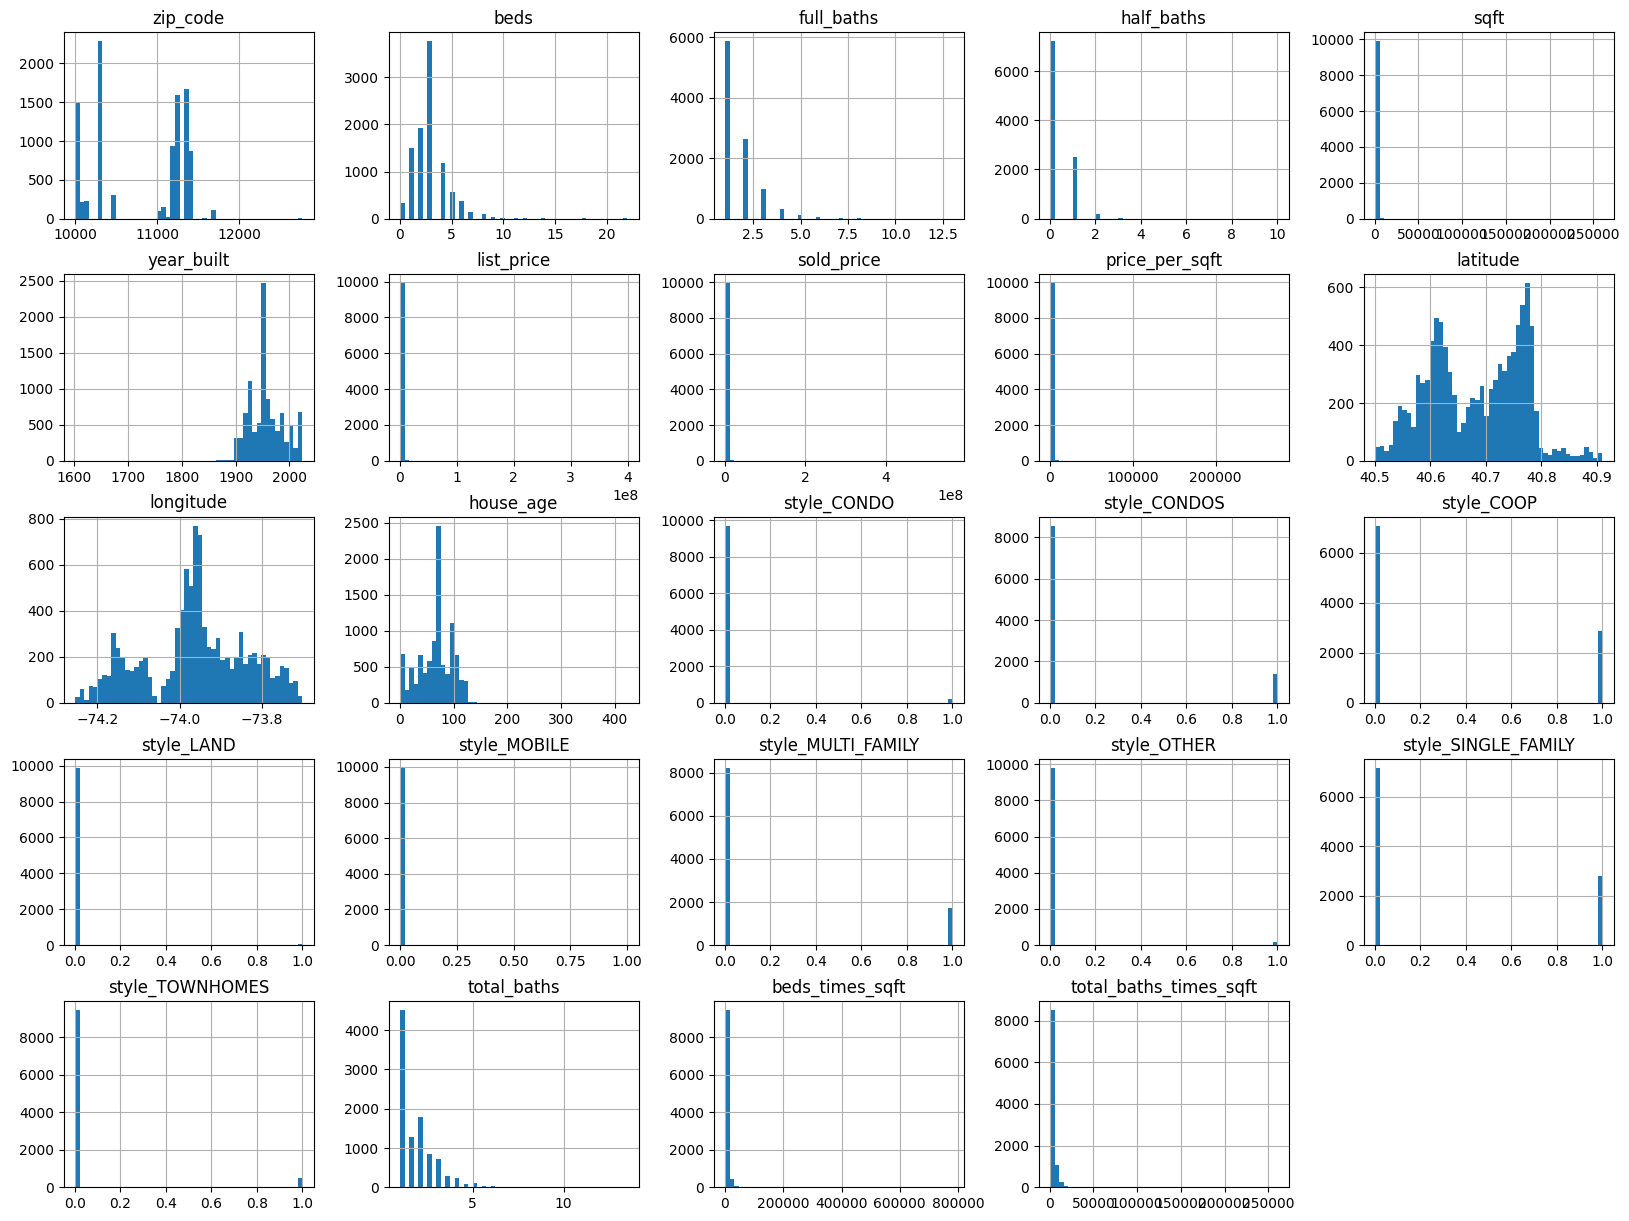

In [19]:
# see the distribution of each feature:
df.hist(bins=50, figsize=(20,15))
plt.show()


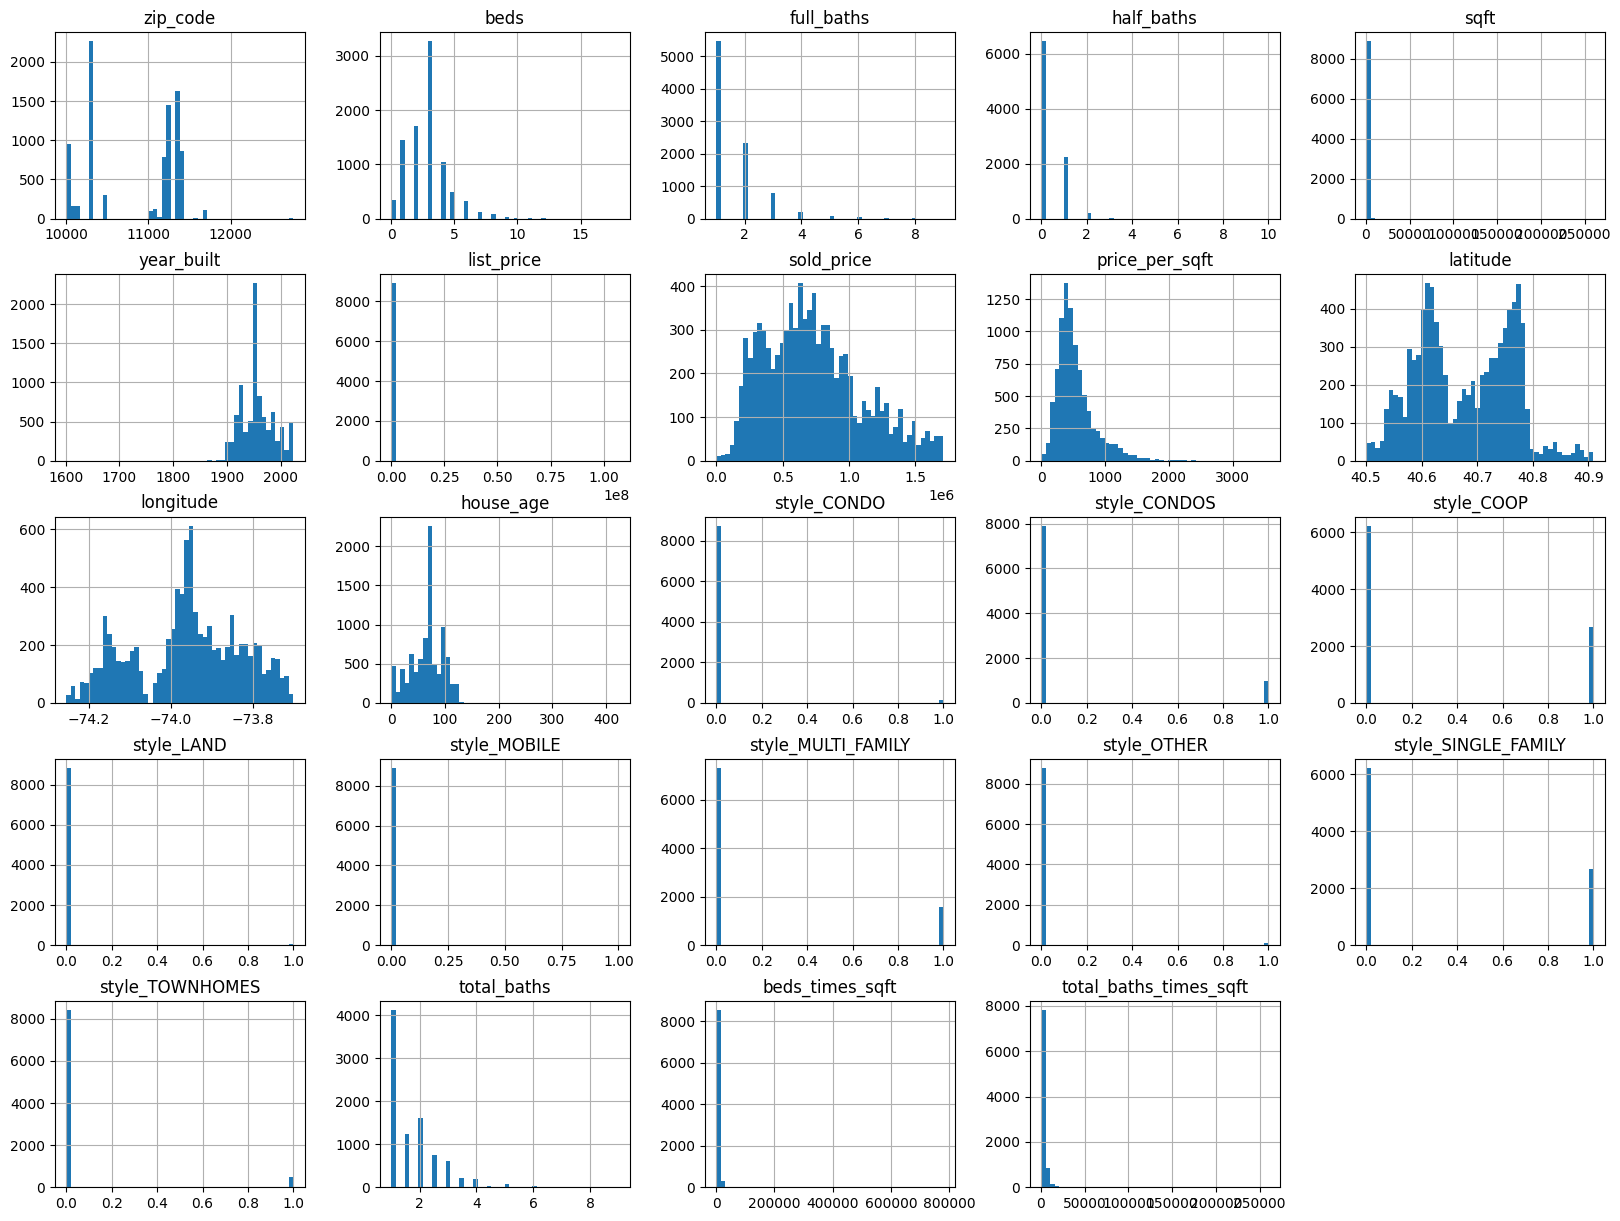

In [45]:
#filter for numerical features:
df_num = df.select_dtypes(include=[np.number])
df_num.hist(bins=50, figsize=(20,15))
plt.show()




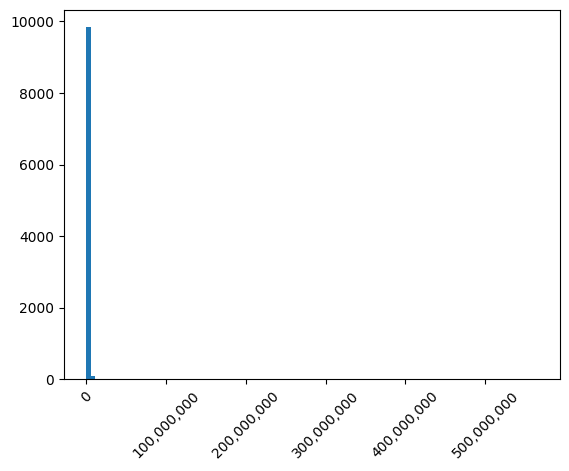

In [35]:
# check the type of sold_price
df['sold_price'].dtype
# change the type of sold_price to float
df['sold_price'] = df['sold_price'].astype(float)



import matplotlib.ticker as ticker

# Change the type of sold_price to float
df['sold_price'] = df['sold_price'].astype(float)

# Create a histogram
fig, ax = plt.subplots()
ax.hist(df['sold_price'], bins=100)  # Increase the number of bins

# Format x-axis
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.xaxis.set_major_formatter(formatter)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()


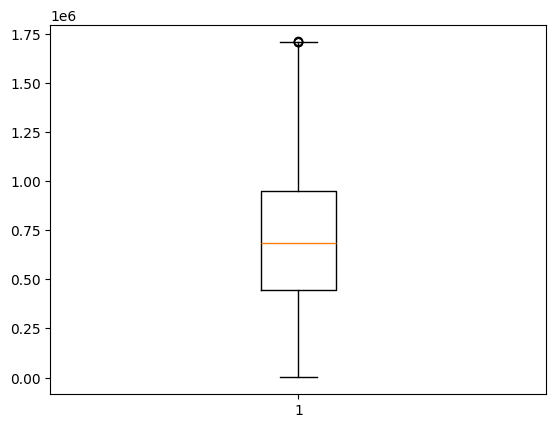

In [44]:
# check for outliers for sold_price
df['sold_price'].describe()
# Use boxplots to detect outliers for sold_price
fig, ax = plt.subplots()
ax.boxplot(df['sold_price'])
plt.show()




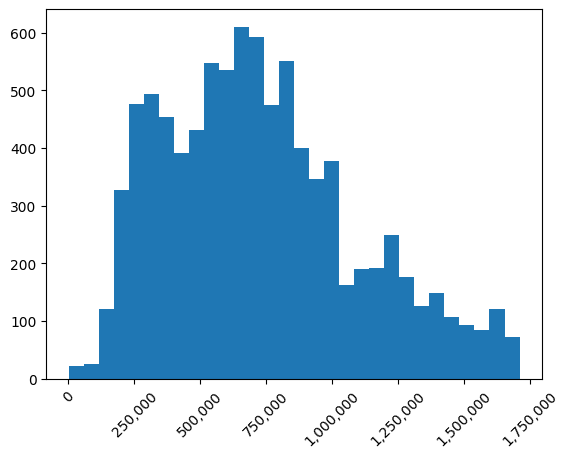

In [39]:
# remove outliers using IQR
Q1 = df['sold_price'].quantile(0.25)
Q3 = df['sold_price'].quantile(0.75)
IQR = Q3 - Q1

# Only keep rows in dataframe that have 'sold_price' within the IQR
df = df[~((df['sold_price'] < (Q1 - 1.5 * IQR)) | (df['sold_price'] > (Q3 + 1.5 * IQR)))]

import matplotlib.ticker as ticker

# Create a histogram
fig, ax = plt.subplots()
ax.hist(df['sold_price'], bins=30)

# Format x-axis
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.xaxis.set_major_formatter(formatter)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

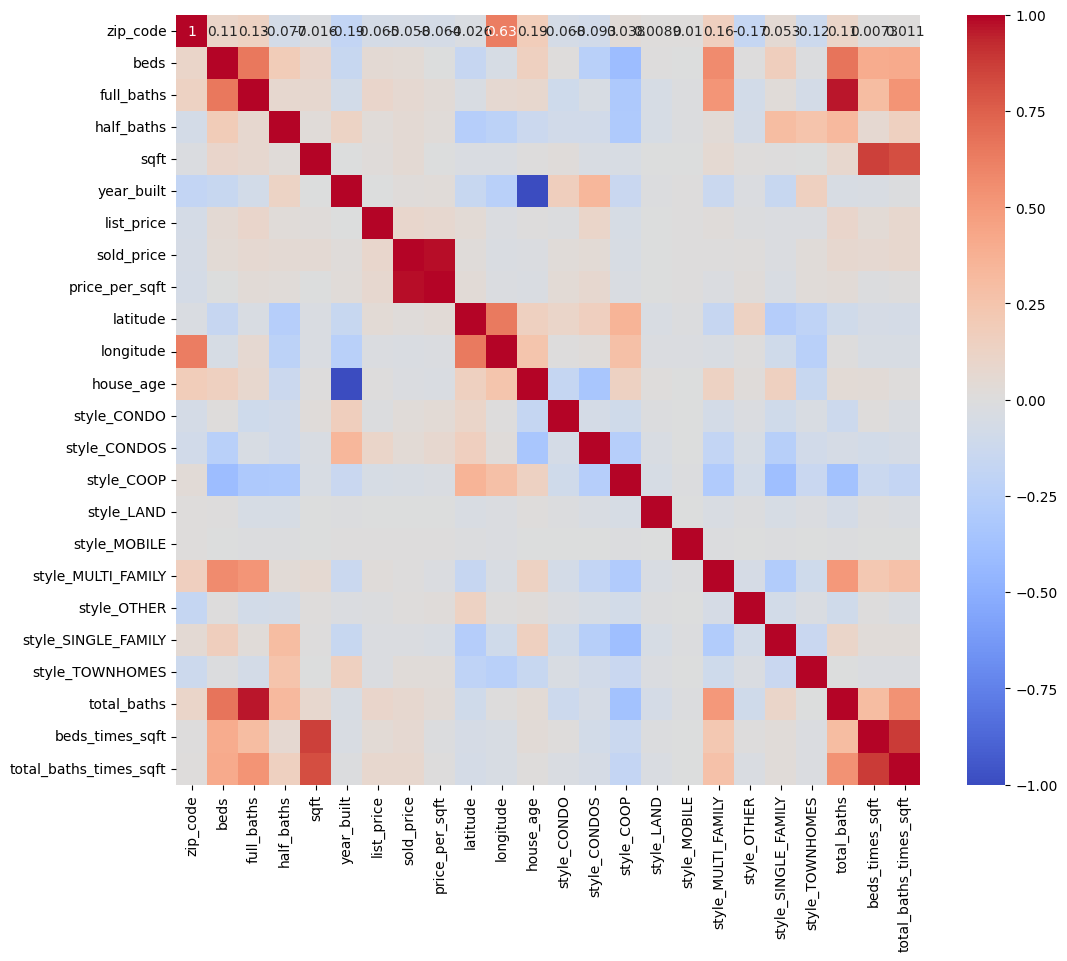

In [43]:
# check the correlation with sold_price
corr_matrix = df_num.corr()
corr_matrix["sold_price"].sort_values(ascending=False)
# plot a heatmap
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()
